In [1]:
from itertools import chain, combinations, filterfalse
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori as apriori2
from mlxtend.frequent_patterns import association_rules as association
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from time import time
from functions import create_complex_test, get_sets, evaluate_recommendations
import pickle

# Create input data for NDI algorithm

In [4]:
# read retail.dat to a list of sets
datContent = [i.strip().split() for i in open("../task1/retail.dat").readlines()]

# remove one-item baskets
indices = []
for i in range(len(datContent)):
    if len(datContent[i]) == 1:
        indices.append(i)

datContent_reduced = [datContent[i] for i in range(len(datContent)) if i not in indices]


# filename = 'ndi 2/df/reduced_retail.txt'

# with open(filename, 'w') as file:
#     for transaction in datContent_reduced:
#         line = ' '.join(transaction)
#         file.write(line + '\n')


# Preprocess data

In [ ]:
# read retail.dat to a list of sets
datContent = [i.strip().split() for i in open("../task1/retail.dat").readlines()]
datContent =  [[int(i) for i in datContent[j]] for j in range(len(datContent))]

# Convert to one hot encoded array
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(datContent)
one_hot_encoded = one_hot_encoded.astype(bool)
# Check for one-item baskets
basket_sizes = np.apply_along_axis(np.sum, axis=1, arr=one_hot_encoded)
# Get indices
indx = np.where(basket_sizes==1)[0]
# Remove one-item baskets
one_hot_encoded = np.delete(arr=one_hot_encoded, obj=indx, axis=0)
train, test = train_test_split(one_hot_encoded, test_size=0.1, random_state=23)

test, test_output = create_complex_test(test)
train_dataframe = pd.DataFrame(train)
user_items = get_sets(test, np.arange(len(test[0])))

# Read working data

In [13]:
with open("../task2/test_output.pickle", "rb") as file:
    test_output = pickle.load(file)

with open("../task2/test_baskets.pickle", "rb") as file:
    user_items = pickle.load(file)

with open("../task2/train_baskets.pickle", "rb") as file:
    train = pickle.load(file)
train_dataframe = pd.DataFrame(train)

# Apriori Results with 85 transactions as min support

In [14]:
results = []
# read apriori results
frq = [i.strip().split() for i in open("output1.txt").readlines()]

# transform output to df
frq_dict = {"support":[],
            "itemsets":[]}

for i in tqdm(range(len(frq))):
    itemsets_list = frq[i][0:len(frq[i])-2]
    frq_dict["itemsets"].append(frozenset([int(x) for x in itemsets_list]))
    supp_str = frq[i][len(frq[i])-2]
    supp_int = int(supp_str[1:len(supp_str)-1])
    frq_dict["support"].append(supp_int)

frq_df = pd.DataFrame.from_dict(frq_dict)
frq_df = frq_df.drop(index=[0])


# Run association
metric = "confidence"
threshold = 0.5

rules_new = association(frq_df, min_threshold = threshold)

# Change format of the associatotion rules
final_rules = []
for i in tqdm(range(len(rules_new))):
    antecedents, consequents, support, confidence, lift = rules_new.iloc[i]["antecedents"], rules_new.iloc[i]["consequents"], rules_new.iloc[i]["support"], rules_new.iloc[i]["confidence"], rules_new.iloc[i]["lift"]
    final_rules.append((antecedents, consequents, support, confidence, lift))


# Get evaluation
top_n = 5
precision, recall, f1_score = evaluate_recommendations(user_items, test_output, final_rules, metric, top_n=top_n)
results.append([precision, recall, f1_score, len(frq)])

100%|██████████| 6603/6603 [00:01<00:00, 6429.45it/s]


# Apriori Results with 125 transactions as min support

In [15]:
# read apriori results
frq = [i.strip().split() for i in open("output2.txt").readlines()]

# transform output to df
frq_dict = {"support":[],
            "itemsets":[]}

for i in tqdm(range(len(frq))):
    itemsets_list = frq[i][0:len(frq[i])-2]
    frq_dict["itemsets"].append(frozenset([int(x) for x in itemsets_list]))
    supp_str = frq[i][len(frq[i])-2]
    supp_int = int(supp_str[1:len(supp_str)-1])
    frq_dict["support"].append(supp_int)

frq_df = pd.DataFrame.from_dict(frq_dict)
frq_df = frq_df.drop(index=[0])


# Run association
metric = "confidence"
threshold = 0.5
rules_new = association(frq_df, min_threshold = threshold)

# Change format of the associatotion rules
final_rules = []
for i in tqdm(range(len(rules_new))):
    antecedents, consequents, support, confidence, lift = rules_new.iloc[i]["antecedents"], rules_new.iloc[i]["consequents"], rules_new.iloc[i]["support"], rules_new.iloc[i]["confidence"], rules_new.iloc[i]["lift"]
    final_rules.append((antecedents, consequents, support, confidence, lift))


# Get evaluation
top_n = 5
precision, recall, f1_score = evaluate_recommendations(user_items, test_output, final_rules, metric, top_n=top_n)
results.append([precision, recall, f1_score, len(frq)])

100%|██████████| 3606/3606 [00:00<00:00, 6438.63it/s]


# Apriori Results with 175 transactions as min support

In [16]:
# read apriori results
frq = [i.strip().split() for i in open("output3.txt").readlines()]

# transform output to df
frq_dict = {"support":[],
            "itemsets":[]}

for i in tqdm(range(len(frq))):
    itemsets_list = frq[i][0:len(frq[i])-2]
    frq_dict["itemsets"].append(frozenset([int(x) for x in itemsets_list]))
    supp_str = frq[i][len(frq[i])-2]
    supp_int = int(supp_str[1:len(supp_str)-1])
    frq_dict["support"].append(supp_int)

frq_df = pd.DataFrame.from_dict(frq_dict)
frq_df = frq_df.drop(index=[0])


# Run association
metric = "confidence"
threshold = 0.5
rules_new = association(frq_df, min_threshold = threshold)

# Change format of the associatotion rules
final_rules = []
for i in tqdm(range(len(rules_new))):
    antecedents, consequents, support, confidence, lift = rules_new.iloc[i]["antecedents"], rules_new.iloc[i]["consequents"], rules_new.iloc[i]["support"], rules_new.iloc[i]["confidence"], rules_new.iloc[i]["lift"]
    final_rules.append((antecedents, consequents, support, confidence, lift))


# Get evaluation
top_n = 5
precision, recall, f1_score = evaluate_recommendations(user_items, test_output, final_rules, metric, top_n=top_n)
results.append([precision, recall, f1_score, len(frq)])

100%|██████████| 2067/2067 [00:00<00:00, 6211.42it/s]


# Apriori Results with 250 transactions as min support

In [17]:
# read apriori results
frq = [i.strip().split() for i in open("output4.txt").readlines()]

# transform output to df
frq_dict = {"support":[],
            "itemsets":[]}

for i in tqdm(range(len(frq))):
    itemsets_list = frq[i][0:len(frq[i])-2]
    frq_dict["itemsets"].append(frozenset([int(x) for x in itemsets_list]))
    supp_str = frq[i][len(frq[i])-2]
    supp_int = int(supp_str[1:len(supp_str)-1])
    frq_dict["support"].append(supp_int)

frq_df = pd.DataFrame.from_dict(frq_dict)
frq_df = frq_df.drop(index=[0])

# Run association
metric = "confidence"
threshold = 0.5
rules_new = association(frq_df, min_threshold = threshold)

# Change format of the associatotion rules
final_rules = []
for i in tqdm(range(len(rules_new))):
    antecedents, consequents, support, confidence, lift = rules_new.iloc[i]["antecedents"], rules_new.iloc[i]["consequents"], rules_new.iloc[i]["support"], rules_new.iloc[i]["confidence"], rules_new.iloc[i]["lift"]
    final_rules.append((antecedents, consequents, support, confidence, lift))

# Get evaluation
top_n = 5
precision, recall, f1_score = evaluate_recommendations(user_items, test_output, final_rules, metric, top_n=top_n)
results.append([precision, recall, f1_score, len(frq)])

100%|██████████| 1180/1180 [00:00<00:00, 6430.94it/s]


# Apriori Results with 450 transactions as min support

In [18]:
# read apriori results
frq = [i.strip().split() for i in open("output5.txt").readlines()]

# transform output to df
frq_dict = {"support":[],
            "itemsets":[]}

for i in tqdm(range(len(frq))):
    itemsets_list = frq[i][0:len(frq[i])-2]
    frq_dict["itemsets"].append(frozenset([int(x) for x in itemsets_list]))
    supp_str = frq[i][len(frq[i])-2]
    supp_int = int(supp_str[1:len(supp_str)-1])
    frq_dict["support"].append(supp_int)

frq_df = pd.DataFrame.from_dict(frq_dict)
frq_df = frq_df.drop(index=[0])

# Run association
metric = "confidence"
threshold = 0.5
rules_new = association(frq_df, min_threshold = threshold)

# Change format of the associatotion rules
final_rules = []
for i in tqdm(range(len(rules_new))):
    antecedents, consequents, support, confidence, lift = rules_new.iloc[i]["antecedents"], rules_new.iloc[i]["consequents"], rules_new.iloc[i]["support"], rules_new.iloc[i]["confidence"], rules_new.iloc[i]["lift"]
    final_rules.append((antecedents, consequents, support, confidence, lift))

# Get evaluation
top_n = 5
precision, recall, f1_score = evaluate_recommendations(user_items, test_output, final_rules, metric, top_n=top_n)
results.append([precision, recall, f1_score, len(frq)])

100%|██████████| 468/468 [00:00<00:00, 6226.20it/s]


# Comparison Table

In [19]:
pd.DataFrame(results, columns=["Precision", "Recall", "F1-score", "itemsets nr"], index=[85, 125, 175, 250, 425])

,Precision,Recall,F1-score,itemsets nr
85,0.357219,0.113860,0.172680,8116
125,0.363138,0.110828,0.169826,4613
175,0.368249,0.105104,0.163533,2735
250,0.372938,0.100598,0.158454,1559
425,0.379918,0.091672,0.147703,624


# Plot thresholds for min support 85

100%|██████████| 252/252 [00:00<00:00, 5891.96it/s]


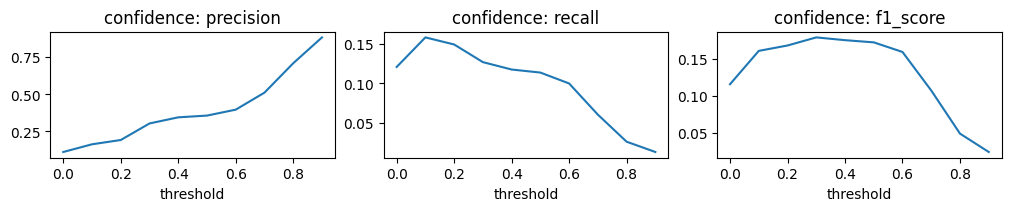

In [20]:
# read apriori results
frq = [i.strip().split() for i in open("output1.txt").readlines()]

# transform output to df
frq_dict = {"support":[],
            "itemsets":[]}

for i in tqdm(range(len(frq))):
    itemsets_list = frq[i][0:len(frq[i])-2]
    frq_dict["itemsets"].append(frozenset([int(x) for x in itemsets_list]))
    supp_str = frq[i][len(frq[i])-2]
    supp_int = int(supp_str[1:len(supp_str)-1])
    frq_dict["support"].append(supp_int)

frq_df = pd.DataFrame.from_dict(frq_dict)
frq_df = frq_df.drop(index=[0])


# Run association
metric = "confidence"
results_dict = {"precision":[], "recall":[], "f1_score":[]}
threshold = np.arange(0, 1, 0.1)

for t in threshold:
    rules_new = association(frq_df, min_threshold = t)

    # Change format of the associatotion rules
    final_rules = []
    for i in tqdm(range(len(rules_new))):
        antecedents, consequents, support, confidence, lift = rules_new.iloc[i]["antecedents"], rules_new.iloc[i]["consequents"], rules_new.iloc[i]["support"], rules_new.iloc[i]["confidence"], rules_new.iloc[i]["lift"]
        final_rules.append((antecedents, consequents, support, confidence, lift))

    # Get evaluation
    top_n = 5
    precision, recall, f1_score = evaluate_recommendations(user_items, test_output, final_rules, metric, top_n=top_n)
    results_dict["precision"].append(precision)
    results_dict["recall"].append(recall)
    results_dict["f1_score"].append(f1_score)

# Plotting threshold analysis
fig, axs = plt.subplots(1, 3, figsize=(10, 2), layout='constrained')
eval_metrics = ["precision", "recall", "f1_score"]

for y, eval in enumerate(eval_metrics):
    axs[y].set_title(metric + ": " + eval)
    axs[y].set_xlabel("threshold")
    axs[y].plot(threshold, results_dict[eval])

plt.show()
